<a href="https://colab.research.google.com/github/jvallalta/ia3/blob/main/ml_sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la física en el deporte en Phython


El momento o cantidad de un movimiento de un cuerpo de masa m que se mueve con una velocidad v viene dado por p = mv.

Imaginemos un corredor de futbol de 100 kg que se desplaza a 5 m/s. ¿Cuál sería su momento?

In [2]:
# Momento de un jugador de futbol en una colisión con otro judador

m = 100. # kg
v = 5. # m/s

# Momento del jugador
p = m * v
print(f'Momento {p} kg*m/s')

Momento 500.0 kg*m/s


El impulso necesario en otro jugador con el que colisiona el primero para deternerlo totalmente viene dado por I = mv dt. 

Imaginemos que la colisión dura medio segundo.

In [4]:
# Impulso necesario para detener al jugador anterior en medio segundo
v1 = 0. # m/s
dt = 0.5 # s

# F=ma or F=m*dv/dt
# F*dt = m*dv

# Impulso para detener al jugador
dv = v1-v
I = m * dv * dt
print(f'Impulso {I} N*s')

Impulso -250.0 N*s


In [5]:
# Fuerza ejercida para detener al primer jugador
F = m * dv / dt
print(f'Force {F} N')

Force -1000.0 N


# Movimiento de proyectiles
En este proyecto econtraremos el angúlo inicial óptimo de lanzamiento de un proyectil. La velocidad inicial es de 30 m/s desde el suelo.

In [7]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Valores de g y velocidad inicial
g = 9.81 # m/s^2
v = 30 # velocidad inicial m/s
angles = np.arange(20, 50, 5)

In [30]:
def projectile(angulo, tiempo):
    # Calcula las coordenadas x e y de la trayectoria de un proyectil
    x = v*tiempo*np.cos(angulo)
    y = v*tiempo*np.sin(angulo) - 0.5*g*tiempo**2
    x = x[y>0]
    y = y[y>0]
    return x,y

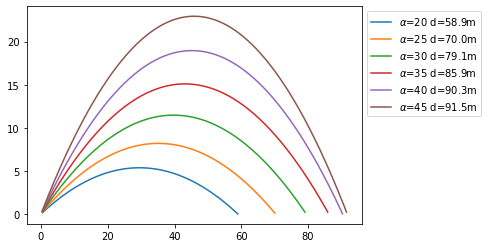

max distance: 91.5m angle=45.0


In [31]:
# Calculamos la distancia máxima y el ángulo asociado
max_distance = 0
best_angle = None
t = np.linspace(0, 5, 300)
for angle in angles:
    x,y=projectile(angle*np.pi/180, t)
    distance = x[-1]
    if max_distance < distance:
        max_distance = distance
        best_angle = angle
    plt.plot(x, y, label=r"$\alpha$"+f"={angle:.0f} d={distance:.1f}m")
    plt.legend(bbox_to_anchor=(1, 1))
plt.show()
print(f"max distance: {max_distance:.1f}m angle={best_angle:.1f}")

A continuación entrenaremos a una red neuronal para aprender el movimineto de proyectiles

In [33]:
from sklearn.model_selection import train_test_split

def generador_datos(size=1000):
  v = np.random.uniform(5, 35, size)
  alpha = np.random.uniform(20,60, size)
  rango_proyectil = [np.power(v,2)*np.sin(np.deg2rad(2*alpha)) / g]
  y = np.reshape(rango_proyectil, (size, 1))
  return train_test_split(np.vstack([v,alpha]).transpose(), y, test_size=0.2, random_state=42)

In [34]:
X_train, X_test, y_train, y_test = generador_datos()

In [40]:
# Construimos un modelo
from keras import models
from keras import layers
from keras import callbacks
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_dim=2))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss="mse", metrics=['mae'])
    return model

In [45]:
# Entrenamos la red
model = build_model()
checkpoint = callbacks.ModelCheckpoint(filepath="projectile.hdf5", verbose=1, save_best_only=True)
model.fit(X_train, y_train, epochs=500, batch_size=10, callbacks=[checkpoint])
score = model.evaluate(X_test, y_test)
Y_pred = model.predict(X_test)
print('Score:', score)

Epoch 1/500
80/80 [==============================] - 0s 956us/step - loss: 1183.1925 - mae: 26.6718
Epoch 2/500
80/80 [==============================] - 0s 921us/step - loss: 195.3461 - mae: 11.5005
Epoch 3/500
80/80 [==============================] - 0s 953us/step - loss: 115.2809 - mae: 8.0200
Epoch 4/500
80/80 [==============================] - 0s 1ms/step - loss: 136.7318 - mae: 8.9325
Epoch 5/500
80/80 [==============================] - 0s 994us/step - loss: 122.4263 - mae: 8.3574
Epoch 6/500
80/80 [==============================] - 0s 933us/step - loss: 117.1166 - mae: 8.1039
Epoch 7/500
80/80 [==============================] - 0s 1ms/step - loss: 110.5520 - mae: 7.9766
Epoch 8/500
80/80 [==============================] - 0s 1ms/step - loss: 109.6363 - mae: 7.7907
Epoch 9/500
80/80 [==============================] - 0s 918us/step - loss: 108.2879 - mae: 7.8068
Epoch 10/500
80/80 [==============================] - 0s 1ms/step - loss: 100.4150 - mae: 7.3558
Epoch 11/500
80/80 [====

In [46]:
# Predecimos 
angle = 45
speed = 30
prediction = model.predict(np.array([(speed,angle)]))
actual = speed**2*np.sin(np.deg2rad(2*angle)) / g
print(f"Predicción: {prediction} real: {actual}")

Predicción: [[92.240074]] real: 91.74311926605505


# Movimiento angular

In [47]:
# Patinadora que extiende y contrase sus brazos
g = 9.81 # m/s^2
m_body = 55 # kg
m_torso = 0.5 * m_body # kg
m_arm = 0.06 * m_body # kg
print(f"m_arm: {m_arm:.2f}kg\nm_torso: {m_torso:.1f}kg")
r_torso = 0.25 # m
r_arm = 0.7 # m
MOI_torso = (1./2.) * m_torso * r_torso**2
MOI_arm = (1./3.) * m_arm * r_arm**2
print(f"Moment of inertia (arm): {MOI_arm:.3f}kg*m^2")
print(f"Moment of inertia (torso): {MOI_torso:.3f}kg*m^2")
MOI_1 = MOI_arm*2 + MOI_torso
MOI_2 = MOI_torso
print(f"Moment of inertia (out): {MOI_1:.3f}kg*m^2")
print(f"Moment of inertia (in): {MOI_2:.3f}kg*m^2")
w1 = 2 # revolutions per second
w2 = w1 * MOI_1 / MOI_2
print(f"Spin rate In: {w1:.0f} Out:  {w2:.0f} rev/sec")

m_arm: 3.30kg
m_torso: 27.5kg
Moment of inertia (arm): 0.539kg*m^2
Moment of inertia (torso): 0.859kg*m^2
Moment of inertia (out): 1.937kg*m^2
Moment of inertia (in): 0.859kg*m^2
Spin rate In: 2 Out:  5 rev/sec


# Parámetros

In [49]:
import torch
import torchvision
import torchvision.models as models
model = models.video.r2plus1d_18(pretrained=True)
model.eval()
params_total = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Parameters: {params_total}')

Downloading: "https://download.pytorch.org/models/r2plus1d_18-91a641e6.pth" to /root/.cache/torch/hub/checkpoints/r2plus1d_18-91a641e6.pth



Parameters: 31505325
